# Análise de Vendas de Café

### Setup

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('coffee_sales.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


## Limpeza e Transformação de Dados

#### Buscando Valores nulos

In [4]:
df.isna().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [5]:
# Mostrando valores nulos para entender a falta de dados
df.loc[df['card'].isna()].head()

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,Americano with Milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte


#### Substituindo Valores Nulos

In [7]:
df['card'] = df['card'].fillna('Cash')

In [8]:
# Checkando contagem de valores nulos para verificar sucesso na mudança
df.isna().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

#### Verificando Formatação de Dados

In [10]:
df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

#### Alterando tipos de dados

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S.%f')
df['cash_type'] = df['cash_type'].astype('category')

In [12]:
# Extraindo horas e minutos
df['time'] = df['datetime'].dt.strftime('%H:%M')

In [13]:
# Checkando nova formatação
df.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type            category
card                   object
money                 float64
coffee_name            object
time                   object
dtype: object

In [14]:
# Deletando coluna Datetime
df = df.drop(['datetime'], axis=1)

## Análise Exploratória

In [15]:
import matplotlib.pyplot as plt

### Dados Estatísticos

In [16]:
df.describe()

,date,money
count,896,896.000000
mean,2024-05-03 07:33:12.857143040,34.143906
min,2024-03-01 00:00:00,23.020000
25%,2024-04-04 00:00:00,28.900000
50%,2024-05-11 00:00:00,34.500000
75%,2024-06-01 00:00:00,37.720000
max,2024-06-30 00:00:00,40.000000
std,NaN,4.573951


### Buscando Cafés Mais Vendidos

In [17]:
df.groupby(['coffee_name'])['coffee_name'].count().sort_values(ascending=False)

coffee_name
Americano with Milk    203
Latte                  187
Cappuccino             164
Americano              133
Cortado                 85
Hot Chocolate           63
Espresso                35
Cocoa                   26
Name: coffee_name, dtype: int64

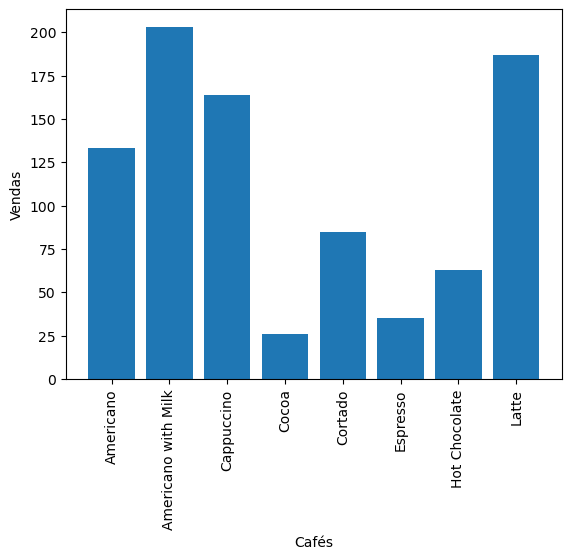

In [18]:
# Visualizando dados
plt.bar(df.groupby(['coffee_name'])['coffee_name'].count().index, df.groupby(['coffee_name'])['coffee_name'].value_counts())
plt.xticks(rotation=90)
plt.ylabel('Vendas')
plt.xlabel('Cafés')
plt.show()

### Buscando Lucros Mensais

In [19]:
df.groupby(df['date'].dt.month)['money'].sum()

date
3    7050.20
4    6720.56
5    9063.42
6    7758.76
Name: money, dtype: float64

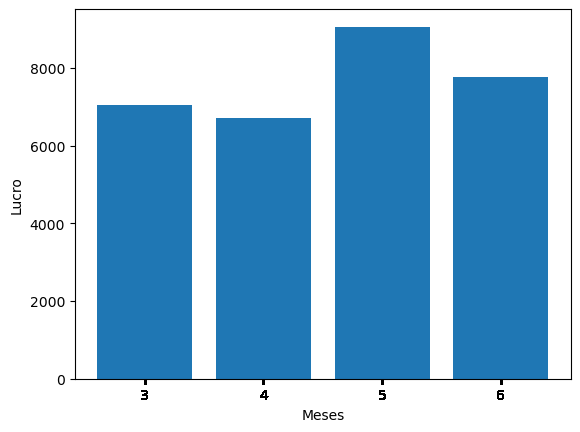

In [20]:
# Visualizando dados
plt.bar(df.groupby(df['date'].dt.month).count().index, df.groupby(df['date'].dt.month)['money'].sum())
plt.xticks(df['date'].dt.month)
plt.ylabel('Lucro')
plt.xlabel('Meses')
plt.show()